#Part 1: Regression on California Test Scores

Import data and clean

In [ ]:
#Import Python libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns

In [ ]:
#Import data
caschool = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")

caschool.head()

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


In [ ]:
# Delete extra variables
caschool = caschool.drop(columns = ['Unnamed: 0', 'distcod', 'county', 'district', 'grspan', 'readscr', 'mathscr'])
caschool.head()

,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677


##1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.   

### Target feature

Text(0, 0.5, 'Count')

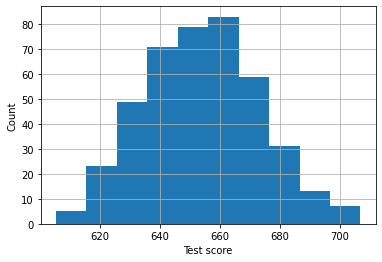

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

caschool['testscr'].hist()
plt.xlabel('Test score')
plt.ylabel('Count')

### Explanatory variables

Text(0, 0.5, 'Count')

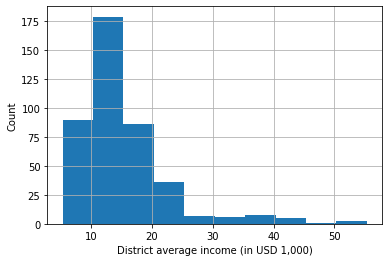

In [ ]:
caschool['avginc'].hist()
plt.xlabel('District average income (in USD 1,000)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

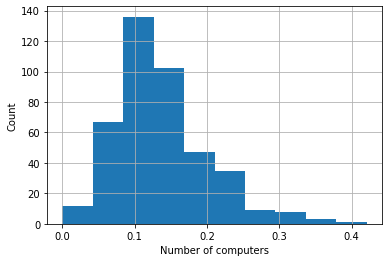

In [ ]:
caschool['compstu'].hist()
plt.xlabel('Number of computers')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

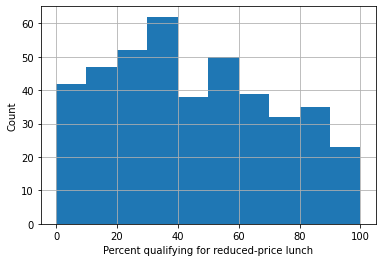

In [ ]:
caschool['mealpct'].hist()
plt.xlabel('Percent qualifying for reduced-price lunch')
plt.ylabel('Count')

## 1.2 Visualize the dependency of the target on each feature from 1.1.

Text(0, 0.5, 'District average income (in USD 1,000)')

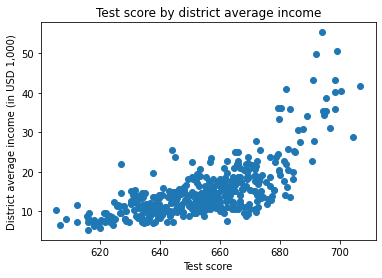

In [ ]:
plt.scatter(caschool['testscr'], caschool['avginc'])
plt.title('Test score by district average income')
plt.xlabel('Test score')
plt.ylabel('District average income (in USD 1,000)')

Text(0, 0.5, 'Number of computers per student')

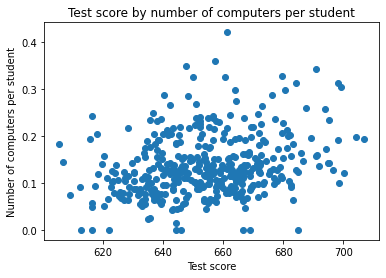

In [ ]:
plt.scatter(caschool['testscr'], caschool['compstu'])
plt.title('Test score by number of computers per student')
plt.xlabel('Test score')
plt.ylabel('Number of computers per student')

Text(0, 0.5, 'Percent qualifying for reduced-price lunch')

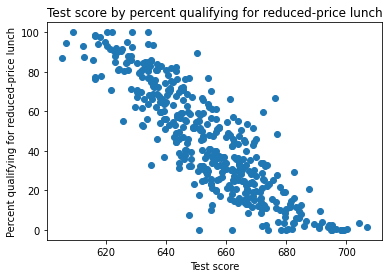

In [ ]:
plt.scatter(caschool['testscr'], caschool['mealpct'])
plt.title('Test score by percent qualifying for reduced-price lunch')
plt.xlabel('Test score')
plt.ylabel('Percent qualifying for reduced-price lunch')

In [ ]:
# from sample
import seaborn as sns
x = sns.regplot(x="testscr", y="expnstu", data=df, color='r')

## 1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

Change variable names to X,y

In [ ]:
y = caschool['testscr']
X = caschool.loc[:, caschool.columns != 'testscr']

print(y[0:5])
X.head()

0    690.799988
1    661.200012
2    643.599976
3    647.700012
4    640.849976
Name: testscr, dtype: float64


,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,0.128090,5235.987793,18.671329,9.080333,13.857677


Train test split

In [ ]:
from sklearn.model_selection import train_test_split

# Use train_test_split(X,y) to create four new data sets, defaults to .75/.25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50)

print(X.shape)
X_train.shape

(420, 10)


(315, 10)

### Trains models

In [ ]:
#KNN regression
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
print("KNN regression test-set score: {:.4f}".format(knn.score(X_test, y_test)))

#Linear regression
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(X_train, y_train)
print("OLS regression test-set score: {:.4f}".format(ols.score(X_test, y_test)))

#Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
print("Ridge regression test-set score: {:.4f}".format(ridge.score(X_test, y_test)))

#Lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
print("Lasso regression test-set score: {:.4f}".format(lasso.score(X_test, y_test)))

KNN regression test-set score: -0.1335
OLS regression test-set score: 0.8163
Ridge regression test-set score: 0.8158
Lasso regression test-set score: 0.8161


### Cross-validation

In [ ]:
#Cross Validation
from sklearn.model_selection import cross_val_score
from statistics import mean 

print("KNN regression CV score:{:.4f}".format(
mean(cross_val_score(KNeighborsRegressor(), X_train, y_train))))
print("OLS regression CV score:{:.4f}".format(
mean(cross_val_score(LinearRegression(), X_train, y_train))))
print("Ridge regression CV score:{:.4f}".format(
mean(cross_val_score(Ridge(), X_train, y_train))))
print("Lasso regression CV score:{:.4f}".format(
mean(cross_val_score(Lasso(), X_train, y_train))))

KNN regression CV score:-0.0204
OLS regression CV score:0.7836
Ridge regression CV score:0.7830
Lasso regression CV score:0.7833


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.686e+02, tolerance: 9.483e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.043e+03, tolerance: 8.995e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


OLS, Ridge, and Lasso have similar good performance, while KNN does badly.

### Standard scalar

In [ ]:
#Standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#KNN regression
knn.fit(X_train_scaled, y_train)
print("Using Standard Scaler\nKNN regression test-set score: {:.4f}".format(knn.score(X_test_scaled, y_test)))

#Linear regression
ols.fit(X_train_scaled, y_train)
print("OLS regression test-set score: {:.4f}".format(ols.score(X_test_scaled, y_test)))

#Ridge regression
ridge.fit(X_train_scaled, y_train)
print("Ridge regression test-set score: {:.4f}".format(ridge.score(X_test_scaled, y_test)))

#Lasso regression
lasso.fit(X_train_scaled, y_train)
print("Lasso regression test-set score: {:.4f}".format(lasso.score(X_test_scaled, y_test)))


print("\nKNN regression CV score:{:.4f}".format(
mean(cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train))))
print("OLS regression CV score:{:.4f}".format(
mean(cross_val_score(LinearRegression(), X_train_scaled, y_train))))
print("Ridge regression CV score:{:.4f}".format(
mean(cross_val_score(Ridge(), X_train_scaled, y_train))))
print("Lasso regression CV score:{:.4f}".format(
mean(cross_val_score(Lasso(), X_train_scaled, y_train))))

Using Standard Scaler
KNN regression test-set score: 0.7326
OLS regression test-set score: 0.8163
Ridge regression test-set score: 0.8168
Lasso regression test-set score: 0.8127

KNN regression CV score:0.7218
OLS regression CV score:0.7836
Ridge regression CV score:0.7842
Lasso regression CV score:0.7835


Scaling the data with the StandardScaler helps a lot with KNN Regression, but no significant improvement for the other three regression methods.

## 1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

### KNN Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

#Tune the parameter of KNN regression
param_grid = {'n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=10)
grid.fit(X_train_scaled, y_train) 

print("best mean cross-validation score: {:.4f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.4f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.7311
best parameters: {'n_neighbors': 9}
test-set score: 0.7312


### OLS has no parameter to be tuned.

### Ridge Regression

In [ ]:
#Tune the parameter of Ridge regression
param_grid = {'alpha': [0.1, 2, 5, 10, 20, 50, 100]}
grid = GridSearchCV(Ridge(), param_grid=param_grid, cv=10)
grid.fit(X_train_scaled, y_train)

print("Ridge regression\nbest mean cross-validation score: {:.4f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.4f}".format(grid.score(X_test_scaled, y_test)))

Ridge regression
best mean cross-validation score: 0.7729
best parameters: {'alpha': 20}
test-set score: 0.8188


### Lasso Regression

In [ ]:
#Tune the parameter of Lasso regression
param_grid = {'alpha': [0.01, 0.1, 1, 2, 5, 10, 20, 50, 100], 'max_iter': [1000, 10000, 100000]}
grid = GridSearchCV(Lasso(), param_grid=param_grid, cv=10)
grid.fit(X_train_scaled, y_train) 

print("Lasso regression\nbest mean cross-validation score: {:.4f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.4f}".format(grid.score(X_test_scaled, y_test)))

Lasso regression
best mean cross-validation score: 0.7724
best parameters: {'alpha': 0.1, 'max_iter': 1000}
test-set score: 0.8159


There is small improvement in the mean cross-validation scores, but that does not necessarily lead to improvement in test scores.

## 1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

In [ ]:
print("Ridge regression coefficients: "+str(ridge.coef_))
print("Lasso regression coefficients: "+str(lasso.coef_))

Ridge regression coefficients: [-0.22607358 -0.6331125  -0.23932253 -9.81194974  1.0403623   0.58416757
  0.69557202 -0.6218374   5.00508501 -3.8740873 ]
Lasso regression coefficients: [-0.         -0.         -0.         -9.95164278 -0.          0.24638937
  0.30234117 -0.16881025  4.64120416 -3.21395419]


I would say basically the two best models agree on which features are important. They both have about -10 on 'mealpct', about 5 on 'avginc', and -3 or -4 on 'elpct'.  However, they do have some different coefficients. For example, Ridge regression puts 1 on 'computer' while Lasso gives 0.


## 1.6 Discuss which final model you would choose to predict new data.

Since both Ridge and Lasso models have rather good performance on cross validation scores and test set scores, I may use any one of them to predict new data, perhaps Ridge because its score is a little bit higher.

# Part 2: Classification on red and white wine characteristics

First, import the red and the white wine csv files into separate pandas dataframe.

In [ ]:
#Import data
red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ';')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
red.shape

(1599, 13)

In [ ]:
white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ';')
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
white.shape

(4898, 13)

Add a new column to each data frame called "winetype".  For the white wine dataset label the values in this column with a 0, indicating white wine.  For the red wine dataset, label values with a 1, indicating red wine. 

In [ ]:
red['winetype'] = '1'
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [ ]:
# sample
r = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ';')
red = r.assign(winetype=1)
red.head()

In [ ]:
white['winetype'] = '0'
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


Combine both datasets into a single dataframe.


In [ ]:
wine = pd.concat([red, white], ignore_index=True)

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,1
4,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [ ]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.5,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.9949,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.3,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.02,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [ ]:
wine.shape

(6497, 13)

In [ ]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
winetype                 object
dtype: object

In [ ]:
y = wine['winetype']
X = wine.loc[:, wine.columns != 'winetype']

print(y[0:5])
X.head()

0    1
1    1
2    1
3    1
4    1
Name: winetype, dtype: object


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.   

In [ ]:
# sample
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='winetype', y='fixed acidity', data=wines)

Text(0, 0.5, 'Count')

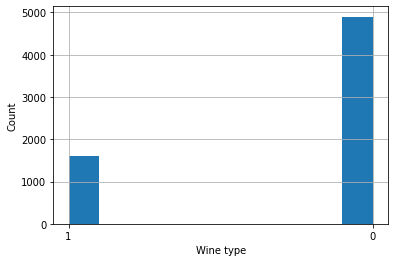

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

y.hist()
plt.xlabel('Wine type')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

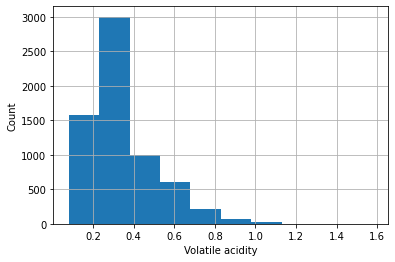

In [ ]:
wine['volatile acidity'].hist()
plt.xlabel('Volatile acidity')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

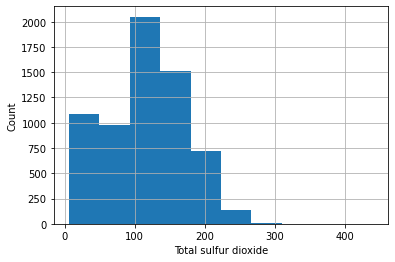

In [ ]:
wine['total sulfur dioxide'].hist()
plt.xlabel('Total sulfur dioxide')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

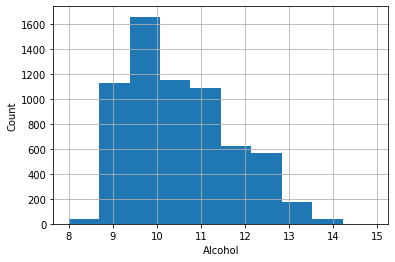

In [ ]:
wine['alcohol'].hist()
plt.xlabel('Alcohol')
plt.ylabel('Count')

## 2.2 Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?

In [ ]:
from sklearn.model_selection import train_test_split

# Use train_test_split(X,y) to create four new data sets, defaults to .75/.25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=73)

print(X.shape)
X_train.shape

(6497, 12)


(4872, 12)

### Train Logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='none').fit(X_train, y_train)

print("logreg .coef_: {}".format(logreg .coef_))

print("Training set score: {:.4f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.4f}".format(logreg.score(X_test, y_test)))

predicted_vals = logreg.predict(X_test) # y_pred includes your predictions
print("logreg.predict: {}".format(predicted_vals))

logreg .coef_: [[ 0.9357331  12.32834338 -2.36016877 -0.1353801   2.11030276  0.07028662
  -0.0758537  -2.37918249  0.82470148 10.38149874 -0.93097176 -0.0437741 ]]
Training set score: 0.9807
Test set score: 0.9803
logreg.predict: ['1' '0' '0' ... '0' '0' '1']


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Train Penalized Logistic Regression model

In [ ]:
plogreg = LogisticRegression(penalty='l2').fit(X_train, y_train)

print("plogreg .coef_: {}".format(plogreg .coef_))

print("Training set score: {:.4f}".format(plogreg.score(X_train, y_train)))
print("Test set score: {:.4f}".format(plogreg.score(X_test, y_test)))

predicted_vals = plogreg.predict(X_test) # y_pred includes your predictions
print("plogreg.predict: {}".format(predicted_vals))

plogreg .coef_: [[ 0.69218788  8.08299392 -1.67220028 -0.19046811  1.35906627  0.04539082
  -0.06138625 -1.36303827  1.12883812  6.67907455 -0.73349426 -0.09910068]]
Training set score: 0.9799
Test set score: 0.9809
plogreg.predict: ['1' '0' '0' ... '0' '0' '1']


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Train KNN Classification model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() 
knn.fit(X_train, y_train)

print("Training set score: {:.4f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.4f}".format(knn.score(X_test, y_test)))
y_pred = knn.predict(X_test) 
print("knn.predict: {}".format(y_pred))

Training set score: 0.9592
Test set score: 0.9335
knn.predict: ['0' '0' '0' ... '0' '0' '1']


### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from statistics import mean 

print("Logistic regression CV score:{:.4f}".format(
mean(cross_val_score(LogisticRegression(penalty='none'), X_train, y_train))))

print("Penalized logistic regression CV score:{:.4f}".format(
mean(cross_val_score(LogisticRegression(penalty='l2'), X_train, y_train))))

print("KNN classification CV score:{:.4f}".format(
mean(cross_val_score(KNeighborsClassifier() , X_train, y_train))))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic regression CV score:0.9807


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Penalized logistic regression CV score:0.9793
KNN classification CV score:0.9403


Logistic regression fails to converge under default parameters. Penalized logistic and knn classification models have slighter lower performance than previous trained model.

### Standard Scalar

In [ ]:
#Standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("Logistic regression CV score:{:.4f}".format(
mean(cross_val_score(LogisticRegression(penalty='none'), X_train_scaled, y_train))))

print("Penalized logistic regression CV score:{:.4f}".format(
mean(cross_val_score(LogisticRegression(penalty='l2'), X_train_scaled, y_train))))

print("KNN classification CV score:{:.4f}".format(
mean(cross_val_score(KNeighborsClassifier() , X_train_scaled, y_train))))

Logistic regression CV score:0.9955
Penalized logistic regression CV score:0.9940
KNN classification CV score:0.9918


Scaling data improves all results to very high scores of over 99%.

## 2.3 Tune the parameters where possible using GridSearchCV. Do the results improve?

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
#Tune the parameter of Logistic regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [1000, 10000, 100000]}
grid = GridSearchCV(LogisticRegression(penalty='none'), param_grid=param_grid, cv=10)
grid.fit(X_train_scaled, y_train) 

print("Logistic regression\nbest mean cross-validation score: {:.4f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.4f}".format(grid.score(X_test_scaled, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

Logistic regression
best mean cross-validation score: 0.9949
best parameters: {'C': 0.001, 'max_iter': 1000}
test-set score: 0.9938


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


In [ ]:
#Tune the parameter of Penalized logistic regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [1000, 10000, 100000]}
grid = GridSearchCV(LogisticRegression(penalty='l2'), param_grid=param_grid, cv=10)
grid.fit(X_train_scaled, y_train) 

print("Penalized logistic regression\nbest mean cross-validation score: {:.4f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.4f}".format(grid.score(X_test_scaled, y_test)))

Penalized logistic regression
best mean cross-validation score: 0.9953
best parameters: {'C': 10, 'max_iter': 1000}
test-set score: 0.9945


In [ ]:
#Tune the parameter of KNN regression
param_grid = {'n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)
grid.fit(X_train_scaled, y_train) 

print("KNN classification\nbest mean cross-validation score: {:.4f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.4f}".format(grid.score(X_test_scaled, y_test)))

KNN classification
best mean cross-validation score: 0.9932
best parameters: {'n_neighbors': 3}
test-set score: 0.9926


Since the results are already very good before tuning parameters, there is no significant improvement.

## 2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?

### KFold with shuffling

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=73) 

In [ ]:
#Tune the parameter of Logistic regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [1000, 10000, 100000]}
grid = GridSearchCV(LogisticRegression(penalty='none'), param_grid=param_grid, cv=kf)
grid.fit(X_train_scaled, y_train) 

print("Logistic regression\nbest mean cross-validation score: {:.4f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.4f}".format(grid.score(X_test_scaled, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

Logistic regression
best mean cross-validation score: 0.9949
best parameters: {'C': 0.001, 'max_iter': 1000}
test-set score: 0.9938


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


In [ ]:
#Tune the parameter of Penalized logistic regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [1000, 10000, 100000]}
grid = GridSearchCV(LogisticRegression(penalty='l2'), param_grid=param_grid, cv=kf)
grid.fit(X_train_scaled, y_train) 

print("Penalized logistic regression\nbest mean cross-validation score: {:.4f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.4f}".format(grid.score(X_test_scaled, y_test)))

Penalized logistic regression
best mean cross-validation score: 0.9953
best parameters: {'C': 10, 'max_iter': 1000}
test-set score: 0.9945


In [ ]:
#Tune the parameter of KNN regression
param_grid = {'n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=kf)
grid.fit(X_train_scaled, y_train) 

print("KNN classification\nbest mean cross-validation score: {:.4f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.4f}".format(grid.score(X_test_scaled, y_test)))

KNN classification
best mean cross-validation score: 0.9930
best parameters: {'n_neighbors': 9}
test-set score: 0.9914


Using kfold with shuffling, the best parameters of logistic and penalized logistic models do not change. But the best n for KNN classifier changes from 3 to 9.

### Change random seed

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=50) 

In [ ]:
#Tune the parameter of Logistic regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [1000, 10000, 100000]}
grid = GridSearchCV(LogisticRegression(penalty='none'), param_grid=param_grid, cv=kf)
grid.fit(X_train_scaled, y_train) 

print("Logistic regression\nbest mean cross-validation score: {:.4f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.4f}".format(grid.score(X_test_scaled, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

Logistic regression
best mean cross-validation score: 0.9947
best parameters: {'C': 0.001, 'max_iter': 1000}
test-set score: 0.9938


In [ ]:
#Tune the parameter of Penalized logistic regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [1000, 10000, 100000]}
grid = GridSearchCV(LogisticRegression(penalty='l2'), param_grid=param_grid, cv=kf)
grid.fit(X_train_scaled, y_train) 

print("Penalized logistic regression\nbest mean cross-validation score: {:.4f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.4f}".format(grid.score(X_test_scaled, y_test)))

Penalized logistic regression
best mean cross-validation score: 0.9951
best parameters: {'C': 10, 'max_iter': 1000}
test-set score: 0.9945


In [ ]:
#Tune the parameter of KNN regression
param_grid = {'n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=kf)
grid.fit(X_train_scaled, y_train) 

print("KNN classification\nbest mean cross-validation score: {:.4f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.4f}".format(grid.score(X_test_scaled, y_test)))

KNN classification
best mean cross-validation score: 0.9934
best parameters: {'n_neighbors': 3}
test-set score: 0.9926


The best parameters of logistic and penalized logistic models do not change. But the best n for KNN classifier changes back to 9.

### Change random state of train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=50)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Tune the parameter of Logistic regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [1000, 10000, 100000]}
grid = GridSearchCV(LogisticRegression(penalty='none'), param_grid=param_grid, cv=kf)
grid.fit(X_train_scaled, y_train) 

print("Logistic regression\nbest mean cross-validation score: {:.4f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.4f}".format(grid.score(X_test_scaled, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

Logistic regression
best mean cross-validation score: 0.9947
best parameters: {'C': 0.001, 'max_iter': 1000}
test-set score: 0.9951


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


In [ ]:
#Tune the parameter of Penalized logistic regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [1000, 10000, 100000]}
grid = GridSearchCV(LogisticRegression(penalty='l2'), param_grid=param_grid, cv=kf)
grid.fit(X_train_scaled, y_train) 

print("Penalized logistic regression\nbest mean cross-validation score: {:.4f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.4f}".format(grid.score(X_test_scaled, y_test)))

Penalized logistic regression
best mean cross-validation score: 0.9947
best parameters: {'C': 100, 'max_iter': 1000}
test-set score: 0.9951


In [ ]:
#Tune the parameter of KNN regression
param_grid = {'n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=kf)
grid.fit(X_train_scaled, y_train) 

print("KNN classification\nbest mean cross-validation score: {:.4f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.4f}".format(grid.score(X_test_scaled, y_test)))

KNN classification
best mean cross-validation score: 0.9930
best parameters: {'n_neighbors': 1}
test-set score: 0.9914


Parameters of logistic regression model do not change. 'C' of penalized logistic model changes to 100. Best 'n' of KNN classifier changes to 1.

## 2.5 Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data.

In [ ]:
logreg = LogisticRegression(penalty='none', C=0.001, max_iter=1000).fit(X_train_scaled, y_train)
plogreg = LogisticRegression(penalty='l2', C=10, max_iter=1000).fit(X_train_scaled, y_train)

print("Logistic regression coefficients:\n"+str(logreg.coef_))
print("Penalized logistic regression coefficients:\n"+str(plogreg.coef_))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


Logistic regression coefficients:
[[-0.32877316  1.0350253  -0.36810726 -4.77315701  0.77422434  1.02376544
  -2.77624272  5.15682274 -0.10264975  0.40796521  1.89696429  0.38296379]]
Penalized logistic regression coefficients:
[[-0.21847479  1.05650547 -0.35737784 -4.4841592   0.78021552  0.96786367
  -2.74332844  4.85138719 -0.02309849  0.43721749  1.7483295   0.37394288]]


The coefficients are quite similar.

The test score of Penalized logistic model is slightly higher than unpenalized one, so I choose the panelized logistic model as the final model.